# Advent of Haystack: Day 1
_Make a copy of this Colab to start!_

In this first challenge, we are going to build a pipeline that answers questions based on the contents of a URL. The given pipeline works as it, but your task is to complete the connnections and add the **other required two components**👇

**You should complete the missing sections in step 3, 4 and 5**

### Initial Components to use:
- [`LinkContentFetcher`](https://docs.haystack.deepset.ai/docs/linkcontentfetcher) for using the contents of several URLs in your pipeline
- [`HTMLToDocument`](https://docs.haystack.deepset.ai/docs/htmltodocument) for converting the HTML files into documents.
- [`PromptBuilder`](https://docs.haystack.deepset.ai/docs/promptbuilder) for creating the prompt
- [`OpenAIGenerator`](https://docs.haystack.deepset.ai/docs/openaigenerator) for generating responses

### 1) Installation

Install `haystack-ai`, `trafilatura` and `sentence-transformers` packages with `pip`:

In [1]:
# !pip install haystack-ai trafilatura "sentence-transformers>=3.0.0"
# !pip install haystack-ai trafilatura
# pip install -U numpy
# pip install -U transformers


### (Optional) Change the Logging Level

This way, not only warnings but also information messages are displayed in the console output.

In [2]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.DEBUG)

### 2) Enter API key for OpenAI
If you will use OpenAI models, save your API key as `OPENAI_API_KEY` environment variable.

In [3]:
from getpass import getpass
import os

# os.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI API key:")
os.environ["OPENAI_API_KEY"] = "sometingHereLocalOllama"

### 3) Create components

Initialize two components to complete the pipeline.

**Hints**:
* One component is to split the documents into smaller chunks of 10 sentences each.
* As the other component, consider methods or components you can use to filter out irrelevant chunks by ranking before injecting the context into the prompt

In [ ]:
from haystack.components.fetchers import LinkContentFetcher
from haystack.components.converters import HTMLToDocument
from haystack.components.builders import PromptBuilder
from haystack.components.generators import OpenAIGenerator
from haystack.components.preprocessors import DocumentSplitter
from haystack.components.rankers import TransformersSimilarityRanker

fetcher = LinkContentFetcher()
converter = HTMLToDocument()
#### INITIALIZE THE MISSING COMPONENTS HERE ####
docSplitter = DocumentSplitter()
filter = TransformersSimilarityRanker(top_k=2)
################################################
template = """Given the information below, answer the query. Only use the provided context to generate the answer and output the used document links
            Context:
            {% for document in documents %}
                {{ document.content }}
                URL: {{ document.meta.url }}
            {% endfor %}

            Question: {{ query }}
            Answer:"""

prompt_builder = PromptBuilder(template = template)
generator = OpenAIGenerator(model="Tulu",api_base_url="http://localhost:4000/v1") # Feel free to try different models or different providers

c:\Users\xlIlI\miniconda3\envs\haystack\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
DEBUG - haystack.core.component.component -  Registering <class 'haystack.components.fetchers.link_content.LinkContentFetcher'> as a component
DEBUG - haystack.core.component.component -  Registered Component <class 'haystack.components.fetchers.link_content.LinkContentFetcher'>
DEBUG - haystack.core.component.component -  Registering <class 'haystack.components.converters.azure.AzureOCRDocumentConverter'> as a component
DEBUG - haystack.core.component.component -  Registered Component <class 'haystack.components.converters.azure.AzureOCRDocumentConverter'>
DEBUG - haystack.core.component.component -  Registering <class 'haystack.components.converters.csv.CSVToDocument'> as a component
DEBUG - haystack.core.component.component 

### 4) Add them to a Haystack Pipeline

In [5]:
from haystack import Pipeline

pipeline = Pipeline()
pipeline.add_component(name="fetcher", instance=fetcher)
pipeline.add_component(name="converter", instance=converter)
#### ADD MISSING COMPONENTS HERE ####
pipeline.add_component(name="docSplitter", instance=docSplitter)
pipeline.add_component(name="filter", instance=filter)
#####################################
pipeline.add_component(name="prompt_builder", instance=prompt_builder)
pipeline.add_component(name="generator", instance=generator)

DEBUG - haystack.core.pipeline.base -  Adding component 'fetcher' (<haystack.components.fetchers.link_content.LinkContentFetcher object at 0x000001FD6DCC4050>

Inputs:
  - urls: List[str]
Outputs:
  - streams: List[ByteStream])
DEBUG - haystack.core.pipeline.base -  Adding component 'converter' (<haystack.components.converters.html.HTMLToDocument object at 0x000001FD6F0FBF50>

Inputs:
  - sources: List[Union[str, Path, ByteStream]]
  - meta: Union[Dict[str, Any], List[Dict[str, Any]]]
  - extraction_kwargs: Optional[Dict[str, Any]]
Outputs:
  - documents: List[Document])
DEBUG - haystack.core.pipeline.base -  Adding component 'docSplitter' (<haystack.components.preprocessors.document_splitter.DocumentSplitter object at 0x000001FD6F1083D0>

Inputs:
  - documents: List[Document]
Outputs:
  - documents: List[Document])
DEBUG - haystack.core.pipeline.base -  Adding component 'filter' (<haystack.components.rankers.transformers_similarity.TransformersSimilarityRanker object at 0x000001FD6F10

###5) Connect the components

Complete the pipeline connections to achieve a working pipeline that can be run.

**Note:** Everytime you want to run cell 4 and cell 5, you need to run cell 3 and reinitialize all components

In [6]:
#### CONNECT ALL COMPONENTS HERE ####
pipeline.connect("fetcher", "converter")
pipeline.connect("converter", "docSplitter")
pipeline.connect("docSplitter", "filter")
pipeline.connect("filter", "prompt_builder")
pipeline.connect("prompt_builder", "generator")
#####################################

DEBUG - haystack.core.pipeline.base -  Connecting 'fetcher.streams' to 'converter.sources'
DEBUG - haystack.core.pipeline.base -  Connecting 'converter.documents' to 'docSplitter.documents'
DEBUG - haystack.core.pipeline.base -  Connecting 'docSplitter.documents' to 'filter.documents'
DEBUG - haystack.core.pipeline.base -  Connecting 'filter.documents' to 'prompt_builder.documents'
DEBUG - haystack.core.pipeline.base -  Connecting 'prompt_builder.prompt' to 'generator.prompt'


🚅 Components
  - fetcher: LinkContentFetcher
  - converter: HTMLToDocument
  - docSplitter: DocumentSplitter
  - filter: TransformersSimilarityRanker
  - prompt_builder: PromptBuilder
  - generator: OpenAIGenerator
🛤️ Connections
  - fetcher.streams -> converter.sources (List[ByteStream])
  - converter.documents -> docSplitter.documents (List[Document])
  - docSplitter.documents -> filter.documents (List[Document])
  - filter.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> generator.prompt (str)

###6) Visualize the Pipeline 🎨

Display the pipeline image with [`show()`](https://docs.haystack.deepset.ai/docs/visualizing-pipelines) method to understand the connections between components

DEBUG - haystack.core.pipeline.draw -  Mermaid diagram:

%%{ init: {'theme': 'neutral' } }%%

graph TD;

fetcher["<b>fetcher</b><br><small><i>LinkContentFetcher</i></small>"]:::component -- "streams -> sources<br><small><i>List[ByteStream]</i></small>" --> converter["<b>converter</b><br><small><i>HTMLToDocument<br><br>Optional inputs:<ul style='text-align:left;'><li>meta (Union[Dict[str, Any], List[Dict[str, Any]]])</li><li>extraction_kwargs (Optional[Dict[str, Any]])</li></ul></i></small>"]:::component
converter["<b>converter</b><br><small><i>HTMLToDocument<br><br>Optional inputs:<ul style='text-align:left;'><li>meta (Union[Dict[str, Any], List[Dict[str, Any]]])</li><li>extraction_kwargs (Optional[Dict[str, Any]])</li></ul></i></small>"]:::component -- "documents -> documents<br><small><i>List[Document]</i></small>" --> docSplitter["<b>docSplitter</b><br><small><i>DocumentSplitter</i></small>"]:::component
docSplitter["<b>docSplitter</b><br><small><i>DocumentSplitter</i></small>"]:::c

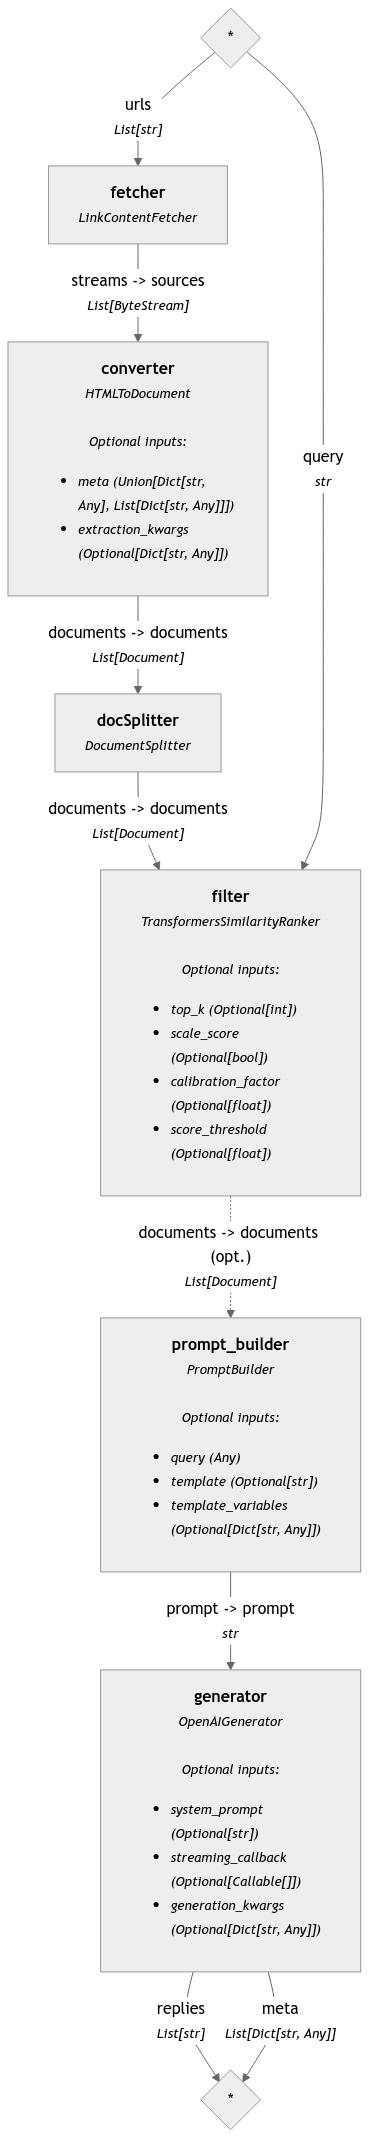

In [7]:
pipeline.show()

###7) Run the Pipeline

Use the URLs below and try the example queries.

In [8]:
urls = ["https://haystack.deepset.ai/blog/extracting-metadata-filter",
        "https://haystack.deepset.ai/blog/query-expansion",
        "https://haystack.deepset.ai/blog/query-decomposition",
        "https://haystack.deepset.ai/cookbook/metadata_enrichment"]

## Example queries you can try
query = "What is the difference between metadata filtering and metadata enrichment?"
# query = "Which methods can I use to transform query for better retrieval?"
# query = "How can I use metadata to improve retrieval?"
# query = "What's preprocessing?" # Should return no answer

## Add parameters
result = pipeline.run(data={"fetcher": {"urls": urls}, "prompt_builder": {"query": query},
                            "filter": {"query": query}})

INFO - haystack.core.pipeline.base -  Warming up component filter...
INFO - haystack.core.pipeline.pipeline -  Running component fetcher
INFO - haystack.core.pipeline.pipeline -  Running component converter
INFO - haystack.core.pipeline.pipeline -  Running component docSplitter
INFO - haystack.core.pipeline.pipeline -  Running component filter
INFO - haystack.core.pipeline.pipeline -  Running component prompt_builder
INFO - haystack.core.pipeline.pipeline -  Running component generator


APITimeoutError: Request timed out.

Print the LLM response

In [ ]:
print(result['generator']['replies'][0])

### (Optional) Bonus Task

Try to recreate the same pipeline but this time, use [OpenAIChatGenerator](https://docs.haystack.deepset.ai/docs/openaichatgenerator) and [ChatPromptBuilder](https://docs.haystack.deepset.ai/docs/chatpromptbuilder)

In [ ]:
from haystack.components.generators.chat import OpenAIChatGenerator
from haystack.components.builders import ChatPromptBuilder
from haystack.dataclasses import ChatMessage

....